In [18]:
#Se importan las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyarrow
import seaborn as sns
from pylab import figure, plot, xlabel, grid, legend, title, savefig

# Base de datos

Esta base de datos fue tomada del **Consejo Nacional de Población** con fecha del **04 de Octubre de 2021**. Es una **base de datos por municipio 2020**.

La tabla es una hoja de excel de nombre **IMM_2020** que se exportó como un .csv. El encoding fue con "latin-1" para poder leer los simbolos con acentuación y la ñ.

In [19]:
IMM_2020 = pd.read_csv('IMM_2020[31].csv', encoding='latin-1')
IMM_2020

,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,GM_2020,IMN_2020
0,1,Aguascalientes,1001,Aguascalientes,948990,1.644738,20.367220,0.104799,0.113169,0.378610,0.591434,10.339530,7.523683,54.226594,60.318795,Muy bajo,0.944508
1,1,Aguascalientes,1002,Asientos,51536,3.526405,33.906364,2.650373,0.486448,0.858160,1.352430,22.942305,78.221049,78.565471,56.546071,Muy bajo,0.885433
2,1,Aguascalientes,1003,Calvillo,58250,4.491509,42.482450,0.365177,0.516760,0.800978,1.040411,19.219858,51.301288,79.259777,57.058251,Muy bajo,0.893453
3,1,Aguascalientes,1004,Cosío,17000,3.144867,27.696745,0.712855,0.577354,0.659833,1.030989,22.716866,65.470588,81.726369,57.114030,Muy bajo,0.894326
4,1,Aguascalientes,1005,Jesús María,129929,2.380588,26.692477,0.277034,0.354957,0.860426,1.312652,16.404575,37.164143,56.748753,59.011762,Muy bajo,0.924042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2464,32,Zacatecas,32054,Villa Hidalgo,19446,7.497894,36.678176,3.010808,0.452908,2.254246,1.137416,21.932484,100.000000,90.877128,55.044146,Bajo,0.861915
2465,32,Zacatecas,32055,Villanueva,31558,4.199744,44.806459,2.536486,0.551254,1.073864,0.895418,15.269627,56.774827,81.912592,56.747058,Muy bajo,0.888580
2466,32,Zacatecas,32056,Zacatecas,149607,1.442438,19.436229,0.294739,0.163292,1.278559,0.484463,9.340958,7.461549,57.885307,60.176191,Muy bajo,0.942275
2467,32,Zacatecas,32057,Trancoso,20455,5.119108,31.992586,3.066130,0.500392,2.860086,1.344192,23.544577,16.788071,83.056133,56.958073,Muy bajo,0.891884


Se checa si la tabla contiene datos nulos que se tengan que tomar en cuenta a la hora de trabajarla.

In [20]:
nulos = IMM_2020.isnull().sum()
nulos

CVE_ENT     0
NOM_ENT     0
CVE_MUN     0
NOM_MUN     0
POB_TOT     0
ANALF       0
SBASC       0
OVSDE       0
OVSEE       0
OVSAE       0
OVPT        0
VHAC        0
PL.5000     0
PO2SM       0
IM_2020     0
GM_2020     0
IMN_2020    0
dtype: int64

No hay datos nulos en ninguna columna.

Listando los significados de cada abreviación de la tabla para un mejor entendimiento:
- CVE_ENT: Clave de entidad federativa.
- NOM_ENT: Nombre de entidad federativa.
- CVE_MUN: Clave del municipio.
- NOM_MUN: Nombre del municipio.
- POB_TOT: Población total.
- ANALF: Porcentaje de población analfabeta de 15 años o más. 
- SBASC: Porcentaje de población de 15 años o más sin educación básica.
- OVSDE: Porcentaje de ocupantes en viviendas particulares habitadas sin drenaje ni excusado.
- OVSEE: Porcentaje de ocupantes en viviendas particulares habitadas sin energía eléctrica.
- OVSAE: Porcentaje de ocupantes en viviendas particulares habitadas sin agua entubada.
- OVPT: Porcentaje de ocupantes en viviendas particulares habitadas con piso de tierra.
- VHAC: Porcentaje de viviendas particulares con hacinamiento.
- PL.5000: Porcentaje de población que vive en localidades menores a 5 000 habitantes. 
- PO2SM: Porcentaje de población ocupada con ingresos de hasta 2 salarios mínimos.
- IM_2020: Índice de marginación, 2020. 
- GM_2020: Grado de marginación, 2020.
- IMN_2020: Índice de marginación normalizado, 2020.

In [21]:
# Se toman las columnas cuantitativas del DataFrame.
cuantitivo = ['POB_TOT','ANALF','SBASC','OVSDE','OVSEE','OVSAE','OVPT','VHAC','IM_2020','IMN_2020']

IMM_2020[cuantitivo].describe()

,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,IM_2020,IMN_2020
count,2.469000e+03,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000
mean,5.103849e+04,10.164466,45.853026,3.159963,1.500793,6.118145,7.987232,26.566286,53.955581,0.844869
std,1.469907e+05,7.633633,13.981594,5.289299,2.769167,9.245995,8.973591,10.586540,3.904590,0.061140
min,8.100000e+01,0.353446,5.535137,0.000000,0.000000,0.000000,0.000000,3.950392,21.406635,0.335198
25%,4.489000e+03,4.427755,35.737568,0.651869,0.366077,0.878499,1.654653,18.725100,51.844432,0.811812
50%,1.355200e+04,8.202762,46.339439,1.428250,0.828157,2.452316,4.714141,25.000000,54.423506,0.852196
75%,3.528400e+04,13.787294,55.856378,3.342618,1.678328,7.285869,11.029646,32.820816,56.696126,0.887782
max,1.922523e+06,53.071253,88.328076,64.450424,53.065463,81.788441,68.149764,69.564018,62.397145,0.977052


Observaciones:
- Hay un municipio en donde el porcentaje de población analfabeta de 15 años o más es del 53%.
- Hay un municipio en donde el porcentaje de 15 años o más sin educación básica es apróximadamente del 88%.
- Hay un municipio en donde el porcentaje de ocupantes en viviendas particulares habitadas sin agua entubada.
- Hay cuatro columnas en donde su media está muy alejada de su valor máximo (SBASC, OVSDE, OVSEE, OVSAE y OVPT).
- En esas mismas cuatro columnas el cuartil 75 está muy alejado de los valores máximos.

# Índices de marginación de municipios

Los grados de marginación son por municipio. Para obtener qué tan distribuida está la población según su grado de marginalidad se puede calcular qué porcentaje de cada municipio se encuentra en x nivel de marginación. Éstas a su vez se separan por estado.

In [22]:
#Grados de marginalidad
grado_marginacion = ['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto']

#Cada nombre de estado es un índice, las columnas son los grados de marginación
#Se cuenta cada municipio por estado en cada nivel de marginación

marg_estado = IMM_2020.pivot_table(index='NOM_ENT', columns='GM_2020', values='CVE_MUN', aggfunc='count')

marg_estado = marg_estado[grado_marginacion]    #Se ordenan las columnas

marg_estado['Total de municipios'] = marg_estado.sum(axis=1)   #Se agrega el total de municipios

# Los valores nulos (que indican que no hay municipios con ese grado) son designados por 0
marg_estado.fillna(0, inplace=True) 
marg_estado

GM_2020,Muy bajo,Bajo,Medio,Alto,Muy alto,Total de municipios
NOM_ENT,,,,,,
Aguascalientes,11.0,0.0,0.0,0.0,0.0,11.0
Baja California,5.0,0.0,1.0,0.0,0.0,6.0
Baja California Sur,5.0,0.0,0.0,0.0,0.0,5.0
Campeche,2.0,6.0,2.0,2.0,0.0,12.0
Chiapas,1.0,7.0,30.0,66.0,20.0,124.0
Chihuahua,31.0,19.0,4.0,2.0,11.0,67.0
Ciudad de México,16.0,0.0,0.0,0.0,0.0,16.0
Coahuila de Zaragoza,30.0,8.0,0.0,0.0,0.0,38.0
Colima,8.0,2.0,0.0,0.0,0.0,10.0


Obteniendo el porcentaje por estado de municipios en cada grado de marginación.

In [23]:
# Se calculan los porcentajes relativos
for grado in grado_marginacion:
    marg_estado[grado + ' (%)'] = marg_estado[grado] / marg_estado['Total de municipios'] * 100

marg_estado[[grado + ' (%)' for grado in grado_marginacion]]

GM_2020,Muy bajo (%),Bajo (%),Medio (%),Alto (%),Muy alto (%)
NOM_ENT,,,,,
Aguascalientes,100.000000,0.000000,0.000000,0.000000,0.000000
Baja California,83.333333,0.000000,16.666667,0.000000,0.000000
Baja California Sur,100.000000,0.000000,0.000000,0.000000,0.000000
Campeche,16.666667,50.000000,16.666667,16.666667,0.000000
Chiapas,0.806452,5.645161,24.193548,53.225806,16.129032
Chihuahua,46.268657,28.358209,5.970149,2.985075,16.417910
Ciudad de México,100.000000,0.000000,0.000000,0.000000,0.000000
Coahuila de Zaragoza,78.947368,21.052632,0.000000,0.000000,0.000000
Colima,80.000000,20.000000,0.000000,0.000000,0.000000


Graficando los porcentajes de grados de marginación por estado.

In [24]:
#Comando para darle una estética distinta a las gráficas.
sns.set(rc={'figure.figsize':(12,12)})
figure(1, figsize=(12, 12))

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

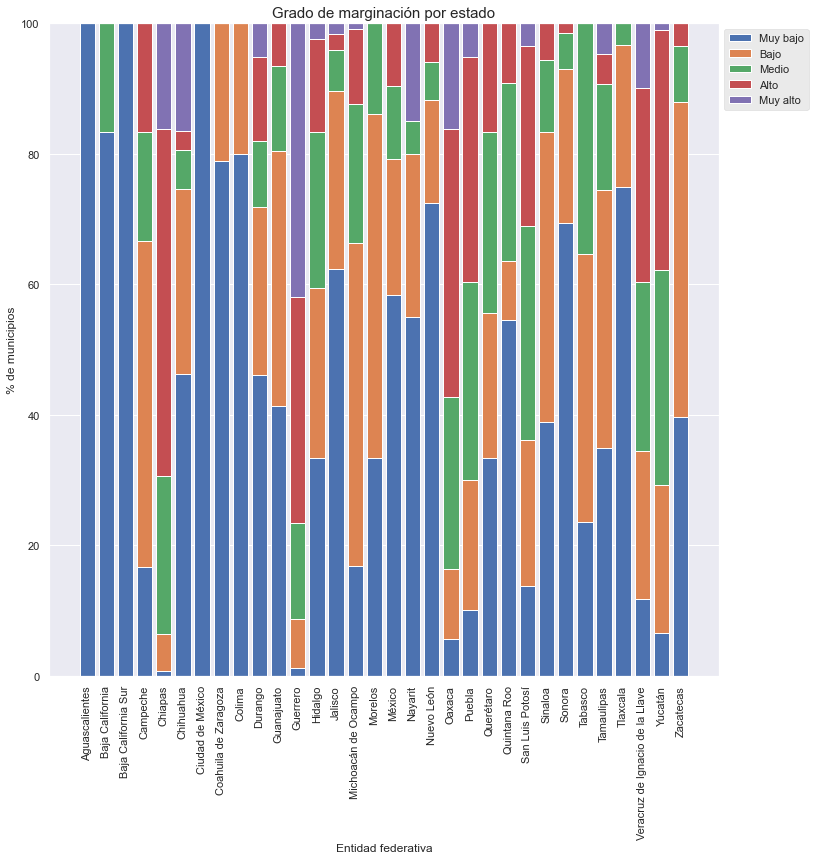

In [25]:
fig, ax = plt.subplots()

# Se obtienen los porcentajes relativos por grado de marginación para cada estado
porc = marg_estado[[grado + ' (%)' for grado in grado_marginacion]].values.T

# Se crea las barras apiladas
bottom = [0] * len(marg_estado.index)
for i in range(len(grado_marginacion)):
    ax.bar(marg_estado.index, porc[i], bottom=bottom, label=grado_marginacion[i])
    bottom += porc[i] #Este es el apilamiento

ax.set_xlabel('Entidad federativa', fontsize = 12)
plt.xticks(rotation=90)


ax.set_ylabel('% de municipios', fontsize = 12)
ax.set_ylim(0, 100)

ax.set_title('Grado de marginación por estado', fontsize = 15)
plt.style.use("ggplot")

# Se separa la leyenda para que no se superponga a la gráfica
legend = ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.savefig('PorcMargPorEstado.png', bbox_inches='tight')
plt.show()

Hay estados con de grados de marginación bajos en relación a los municipios en dichos grados, mientras que hay estados donde la mitad de sus municipios tienen grados de marginación de medio a alto. Para llegar más allá se tiene que analizar como esta distribuida la población en estos grados de marginación.

In [28]:
#Cada nombre de estado es un índice, las columas son los grados de marginación
#Se suma la población de cada municipio por estado en cada nivel de marginación
marg_estado_poblacion = IMM_2020.pivot_table(index='NOM_ENT', columns='GM_2020', values='POB_TOT', aggfunc='sum')
marg_estado_poblacion = marg_estado_poblacion[grado_marginacion]
marg_estado_poblacion['Total municipios'] = marg_estado_poblacion.sum(axis=1)
marg_estado_poblacion.fillna(0, inplace=True)
marg_estado_poblacion

GM_2020,Muy bajo,Bajo,Medio,Alto,Muy alto,Total municipios
NOM_ENT,,,,,,
Aguascalientes,1425607.0,0.0,0.0,0.0,0.0,1425607.0
Baja California,3651452.0,0.0,117568.0,0.0,0.0,3769020.0
Baja California Sur,798447.0,0.0,0.0,0.0,0.0,798447.0
Campeche,542922.0,255991.0,50823.0,78627.0,0.0,928363.0
Chiapas,604147.0,998167.0,1177464.0,1720632.0,1043418.0,5543828.0
Chihuahua,3410282.0,102330.0,20091.0,26108.0,183058.0,3741869.0
Ciudad de México,9209944.0,0.0,0.0,0.0,0.0,9209944.0
Coahuila de Zaragoza,3096015.0,50756.0,0.0,0.0,0.0,3146771.0
Colima,698142.0,33249.0,0.0,0.0,0.0,731391.0


In [29]:
# Se calculan los porcentajes relativos de municipios por estado para cada grado de marginación
for grado in grado_marginacion:
    marg_estado_poblacion[grado + ' (%)'] = marg_estado_poblacion[grado] / marg_estado_poblacion['Total municipios'] * 100

marg_estado_poblacion[[grado + ' (%)' for grado in grado_marginacion]]

GM_2020,Muy bajo (%),Bajo (%),Medio (%),Alto (%),Muy alto (%)
NOM_ENT,,,,,
Aguascalientes,100.000000,0.000000,0.000000,0.000000,0.000000
Baja California,96.880675,0.000000,3.119325,0.000000,0.000000
Baja California Sur,100.000000,0.000000,0.000000,0.000000,0.000000
Campeche,58.481650,27.574451,5.474475,8.469424,0.000000
Chiapas,10.897651,18.005014,21.239187,31.036894,18.821255
Chihuahua,91.138466,2.734730,0.536924,0.697726,4.892154
Ciudad de México,100.000000,0.000000,0.000000,0.000000,0.000000
Coahuila de Zaragoza,98.387045,1.612955,0.000000,0.000000,0.000000
Colima,95.454005,4.545995,0.000000,0.000000,0.000000


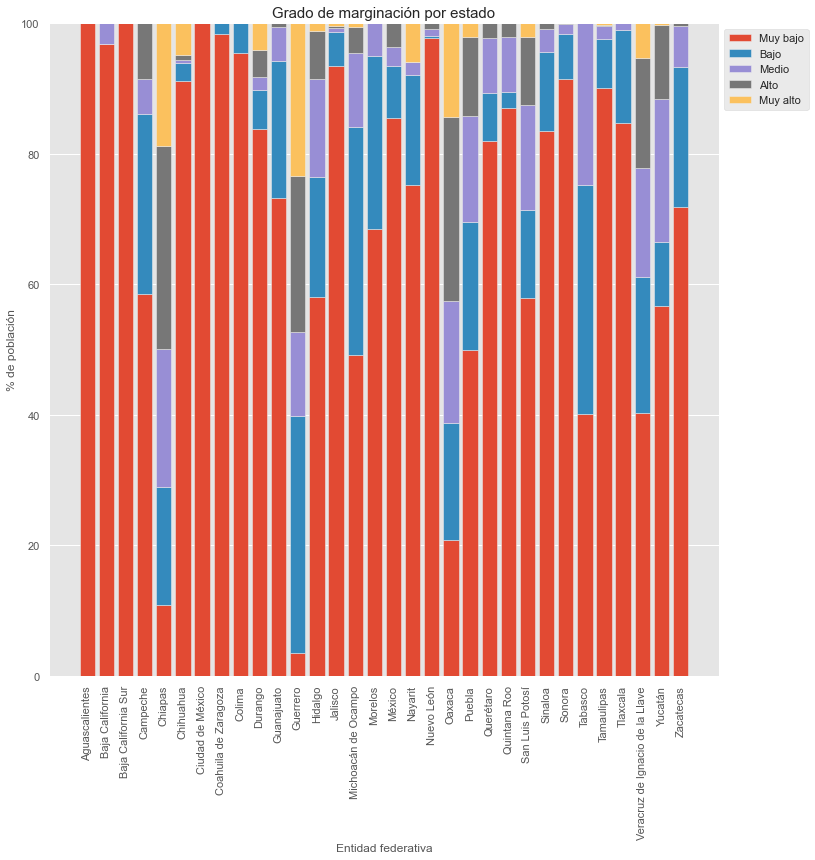

In [30]:
fig, ax = plt.subplots()

#Se obtienen los porcentajes relativos
porc = marg_estado_poblacion[[grado + ' (%)' for grado in grado_marginacion]].values.T

# Se crea las barras apiladas
bottom = [0] * len(marg_estado_poblacion.index)
for i in range(len(grado_marginacion)):
    ax.bar(marg_estado_poblacion.index, porc[i], bottom=bottom, label=grado_marginacion[i])
    bottom += porc[i]

ax.set_xlabel('Entidad federativa', fontsize = 12)
plt.xticks(rotation=90)

ax.set_ylabel('% de población', fontsize = 12)
ax.set_ylim(0, 100)

ax.set_title('Grado de marginación por estado', fontsize = 15)

# Se separa la leyenda para que no se superponga a la gráfica
legend = ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.savefig('PorcMargEstadoPoblacion.jpg', bbox_inches='tight')
plt.show()

La mayoría de la población vive en municipios con bajos niveles de marginación, especialmente en municipios con muy baja marginación. En general, los estados que tienen más del 50% de sus municipios con niveles de marginación bajos a muy altos, tienden a tener una población concentrada en municipios con marginación muy baja a baja. Algunos ejemplos son San Luis Potosí, Hidalgo, Querétaro y Tamaulipas. Sin embargo, existe una excepción cuando al menos el 50% de los municipios tienen niveles de marginación alto a muy alto, ya que aproximadamente el 50% de la población se encuentra en estos municipios. Chiapas, Guerrero y Oaxaca son ejemplos de estados que siguen esta excepción. En el caso específico de Guerrero, más del 60% de sus municipios tienen altos niveles de marginación, mientras que el 50% de la población vive en municipios con marginación media a muy baja. 

# Analfabetismo de poblaciones en localidades chicas

Se hace un DataFrame que contiene nada más el porcentaje de analfabetismo y el porcentaje de poblaciones pequeñas.

In [31]:
analf_poblacion = IMM_2020[['ANALF','PL.5000']]
analf_poblacion

,ANALF,PL.5000
0,1.644738,7.523683
1,3.526405,78.221049
2,4.491509,51.301288
3,3.144867,65.470588
4,2.380588,37.164143
...,...,...
2464,7.497894,100.000000
2465,4.199744,56.774827
2466,1.442438,7.461549
2467,5.119108,16.788071


El dataframe no muestra una visualización clara, pero al representarlo en un gráfico de dispersión se puede observar la relación entre ambas variables. Cada punto en el gráfico representa un municipio, donde la altura indica el porcentaje de población analfabeta, y a medida que se desplaza hacia la derecha, representa un mayor porcentaje de localidades con menos de 5000 habitantes en el municipio.

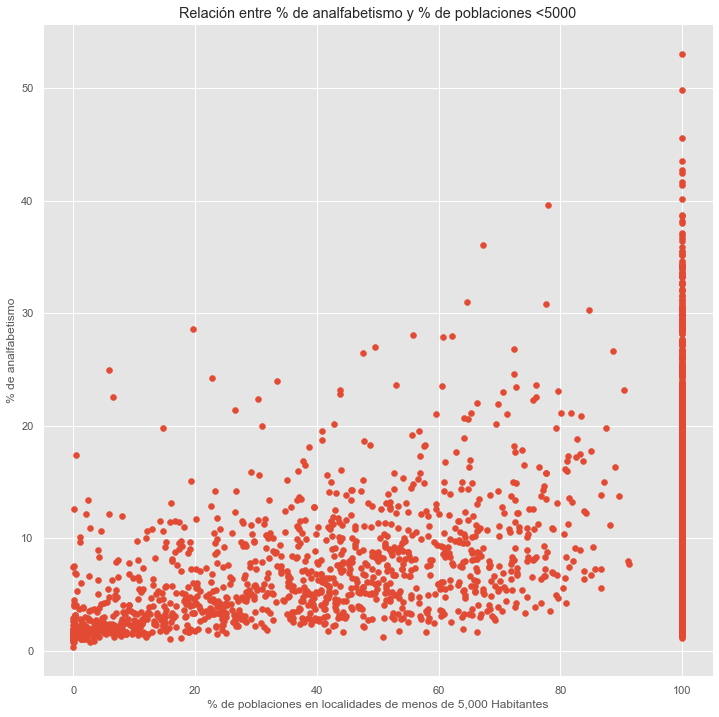

In [35]:
porc_analf = analf_poblacion['ANALF']
porc_poblacion = analf_poblacion['PL.5000']

#Se crea el gráfico de dispersión
plt.scatter(porc_poblacion, porc_analf)

plt.xlabel('% de poblaciones en localidades de menos de 5,000 Habitantes')
plt.ylabel('% de analfabetismo')
plt.title('Relación entre % de analfabetismo y % de poblaciones <5000')

plt.show()

A medida que aumenta el porcentaje de localidades con menos de 5000 habitantes, parece haber una tendencia al aumento del porcentaje de población analfabeta mayor de 15 años. Sin embargo, antes de analizar cualquier correlación, es importante excluir los municipios con un 100% de localidades con menos de 5000 habitantes, ya que estos distorsionan por completo la tendencia.

In [36]:
#Se omiten los municipios PL.5000 de 100%
municipios_not100_pl5000 = IMM_2020.groupby(['CVE_ENT', 'NOM_ENT', 'CVE_MUN', 'NOM_MUN']).filter(lambda x: x['PL.5000'].ne(100).any())
analf_poblaciones_not100_pl5000 = municipios_not100_pl5000[['ANALF','PL.5000']]
porcentaje_analfabetismo_not100_pl5000 = analf_poblaciones_not100_pl5000['ANALF']
porcentaje_poblaciones_not100_pl5000 = analf_poblaciones_not100_pl5000['PL.5000']

coef_corr = np.corrcoef(porcentaje_analfabetismo_not100_pl5000, porcentaje_poblaciones_not100_pl5000)[0, 1]
print('Hay un coeficiente de correlacion de:',coef_corr)

Hay un coeficiente de correlacion de: 0.49029119965463064


El coeficiente de correlación parece respaldar la existencia de una relación entre el porcentaje de localidades con menos de 5000 habitantes y el porcentaje de analfabetismo, aunque no es una correlación fuerte. Se requiere más investigación para comprender cómo se produce esta relación y cuáles son sus límites.

Es importante tener precaución y analizar cuidadosamente el coeficiente de correlación, ya que por sí solo no puede brindar conclusiones definitivas. Sin embargo, en el gráfico se puede observar una tendencia: a medida que aumenta el porcentaje de localidades con menos de 5000 habitantes, los estados se dispersan hacia arriba en el gráfico y adquieren un color más brillante. Por lo tanto, no se puede negar la existencia de una relación, pero es necesario investigar cómo se desarrolla esta relación.

Continuando con el tema de los municipios conformados en un 100% por localidades con menos de 5000 habitantes, desde el informe IMM_2020 se pudo observar que existen casos de estos municipios. Para analizar la relación entre las variables, sería conveniente omitir las poblaciones que tienen un 100% de localidades con menos de 5000 habitantes. Estos municipios llenan todo el rango de porcentajes de analfabetismo de manera casi uniforme y están alejados del resto en un porcentaje significativo. Por lo tanto, es importante destacar que estos municipios deben ser estudiados por separado del grupo más disperso, ya que exhiben un comportamiento atípico evidente. Es necesario hacer estas distinciones para analizar estos fenómenos. Antes de hacer suposiciones sobre lo que ocurre con este grupo de municipios pequeños, sería prudente examinar un informe IMM_2020 filtrado que incluya solo los municipios con un 100% de localidades con menos de 5000 habitantes.

In [37]:
# Filtrar los municipios con 100% de PL.5000
municipios_100_pl5000 = IMM_2020.groupby(['CVE_ENT', 'NOM_ENT', 'CVE_MUN', 'NOM_MUN']).filter(lambda x: x['PL.5000'].eq(100).all())
municipios_100_pl5000_lite = municipios_100_pl5000[['NOM_MUN', 'POB_TOT', 'PL.5000']]
municipios_100_pl5000_lite

,NOM_MUN,POB_TOT,PL.5000
28,Palizada,8683,100.0
34,Abasolo,1022,100.0
38,Candela,1643,100.0
41,Escobedo,3047,100.0
45,Guerrero,1643,100.0
...,...,...,...
2456,Tepetongo,6490,100.0
2457,Teúl de González Ortega,5356,100.0
2460,Vetagrande,10276,100.0
2464,Villa Hidalgo,19446,100.0


Es evidente que los municipios que tienen un 100% de localidades con menos de 5000 habitantes constituyen la mitad de los municipios del país, por lo que no se pueden ignorar y merecen un análisis específico. Para continuar explorando el tamaño de estos municipios, se pueden realizar las siguientes comparaciones.

In [38]:
#Contamos los municipios que podrían compararse con una localidad de <5000
muni_menos_5000 = municipios_100_pl5000_lite[municipios_100_pl5000_lite['POB_TOT']<5000].count()[0]
print('Son', muni_menos_5000,'municipios de menos de 5000 habitantes')

# Contamos los municipios que podrían compararse con dos localidades de <5000
muni_menos_10000 = municipios_100_pl5000_lite[municipios_100_pl5000_lite['POB_TOT']<5000*2].count()[0]
print('Son', muni_menos_10000,'municipios de menos de 10000 habitantes')

Son 674 municipios de menos de 5000 habitantes
Son 953 municipios de menos de 10000 habitantes


Por lo tanto, aproximadamente el 75% de los municipios que consisten únicamente en localidades con menos de 5000 habitantes son en realidad uno o dos pueblos pequeños, o una serie de localidades pequeñas. En mi opinión, las conclusiones obtenidas sobre el comportamiento general de la marginación en los estados no son aplicables, en primera instancia, a los municipios pequeños. Estos municipios pequeños pueden tener una distribución de datos estadísticos muy diferente, y se deben analizar múltiples aspectos en conjunto para comprender cómo se comporta la marginalidad en ellos.

Para evaluar qué tan diferente es este comportamiento, se realizará el mismo análisis inicial sobre los niveles de marginación en los municipios y las poblaciones por estado, pero considerando únicamente las localidades que tienen un 100% de localidades con menos de 5000 habitantes.

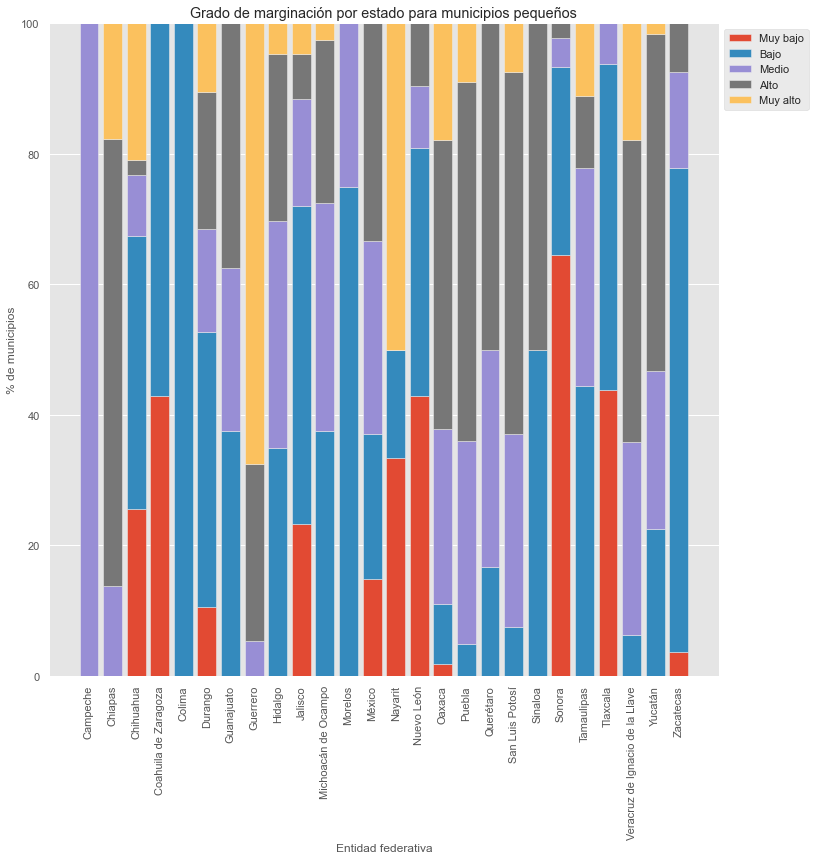

In [48]:
municipios_100_pl5000_pivot = municipios_100_pl5000.pivot_table(index='NOM_ENT', columns='GM_2020', values='CVE_MUN', aggfunc='count')
municipios_100_pl5000_pivot = municipios_100_pl5000_pivot[grado_marginacion]
municipios_100_pl5000_pivot['Total Municipios'] = municipios_100_pl5000_pivot.sum(axis=1)
municipios_100_pl5000_pivot.fillna(0, inplace=True)

# Se calculan los porcentajes relativos de municipios por estado para cada grado de marginación
for grado in grado_marginacion:
    municipios_100_pl5000_pivot[grado + ' (%)'] = municipios_100_pl5000_pivot[grado] / municipios_100_pl5000_pivot['Total Municipios'] * 100

municipios_100_pl5000_pivot[[grado + ' (%)' for grado in grado_marginacion]]
fig, ax = plt.subplots()

# Se obtienen los porcentajes relativos por grado de marginación para cada estado
porcentajes = municipios_100_pl5000_pivot[[grado + ' (%)' for grado in grado_marginacion]].values.T

# Se crea las barras apiladas
bottom = [0] * len(municipios_100_pl5000_pivot.index)
for i in range(len(grado_marginacion)):
    ax.bar(municipios_100_pl5000_pivot.index, porcentajes[i], bottom=bottom, label=grado_marginacion[i])
    bottom += porcentajes[i]

ax.set_xlabel('Entidad federativa')
plt.xticks(rotation=90)

ax.set_ylabel('% de municipios')
ax.set_ylim(0, 100)

ax.set_title('Grado de marginación por estado para municipios pequeños')

# Crear una leyenda separada
legend = ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.savefig('PorcMargEstadoMunicipiosPl5000.png', bbox_inches='tight')
plt.show()

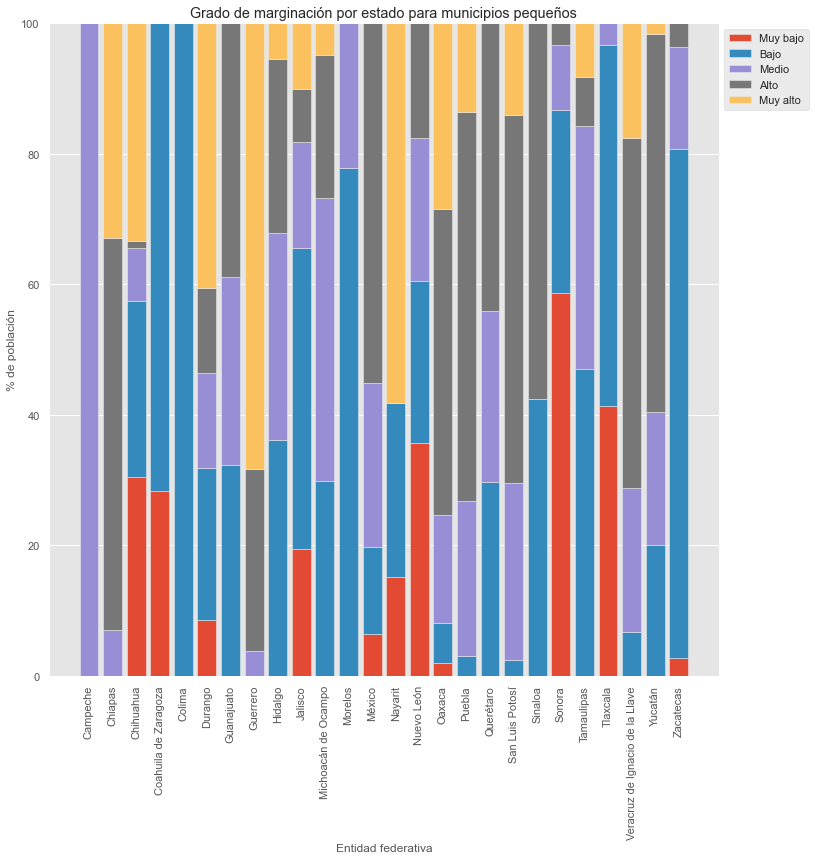

In [51]:
municipios_100_pl5000_pob_pivot = municipios_100_pl5000.pivot_table(index='NOM_ENT', columns='GM_2020', values='POB_TOT', aggfunc='sum')
municipios_100_pl5000_pob_pivot = municipios_100_pl5000_pob_pivot[grado_marginacion]
municipios_100_pl5000_pob_pivot['Total Municipios'] = municipios_100_pl5000_pob_pivot.sum(axis=1)
municipios_100_pl5000_pob_pivot.fillna(0, inplace=True)

# Se calculan los porcentajes relativos de municipios por estado para cada grado de marginación
for grado in grado_marginacion:
    municipios_100_pl5000_pob_pivot[grado + ' (%)'] = municipios_100_pl5000_pob_pivot[grado] / municipios_100_pl5000_pob_pivot['Total Municipios'] * 100

municipios_100_pl5000_pob_pivot[[grado + ' (%)' for grado in grado_marginacion]]
fig, ax = plt.subplots()

# Se obtienen los porcentajes relativos por grado de marginación para cada estado
porcentajes = municipios_100_pl5000_pob_pivot[[grado + ' (%)' for grado in grado_marginacion]].values.T

# Se crea las barras apiladas
bottom = [0] * len(municipios_100_pl5000_pob_pivot.index)
for i in range(len(grado_marginacion)):
    ax.bar(municipios_100_pl5000_pob_pivot.index, porcentajes[i], bottom=bottom, label=grado_marginacion[i])
    bottom += porcentajes[i]

ax.set_xlabel('Entidad federativa')
plt.xticks(rotation=90)

ax.set_ylabel('% de población')
ax.set_ylim(0, 100)

ax.set_title('Grado de marginación por estado para municipios pequeños')

# Crear una leyenda separada
legend = ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.savefig('PorcMargEstadoPoblaciónPl5000.png', bbox_inches='tight')
plt.show()

En resumen, al comparar los comportamientos analizados anteriormente entre la población en general y los municipios pequeños, se evidencia que los resultados obtenidos para todos los municipios no son aplicables directamente a los municipios pequeños. Existe una diferencia significativa en los patrones de marginación y distribución de población entre ambos grupos. Por lo tanto, es importante reconocer que el comportamiento de un estado en su conjunto no se puede generalizar al análisis de sus comunidades más pequeñas.